# Cross Validation (optional)
This is resaerch methods that I have to show in my research paper. So for research purpose, I first run "cross-validation" analysis to make sure the data does not have too much outliers, measnwhile I also test several different machine learning model, and according to the r2 and RMSE, random forest has the best performance. If random forest model has be chosen (which I have already know), the follwing steps are not necessary anymore.

In [48]:
import os
import pandas as pd
from numpy import mean
from numpy import std
import numpy as np
from joblib import dump, load
from pandas import DataFrame
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
#from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

In [49]:
cwd = os.getcwd()
file_path = os.path.join(cwd, 'Data', 'Noer clipping 2019-20_train.xlsx')
data = pd.read_excel(file_path)

#data = pd.read_excel("C:\\Users\\qzhou9\\Growth model - clippings\\Data\\Noer clipping 2019-20_train.xlsx")

In [50]:
#varaibles I used for training the model, detailed about what it actual means are listed in "readme.doc" file
x=data[['mosit avg (3 days)','Rootzone','N rate (kg/ha/2wks)','Days grow','moist',
        'NDRE','Traffic (rounds/week)','Tmax (°C)','Tmax (pre 1 day)',
        'Tmax (pre 2 days)', 'Tmax (pre 3 days)', 'Tmax (pre 4 days)',
        'Tmax (pre 5 days)', 'Tmax (pre 6 days)','Tmin (°C)','Tmin (pre 1 day)',
        'Tmin (pre 2 days)', 'Tmin (pre 3 days)', 'Tmin (pre 4 days)',
        'Tmin (pre 5 days)', 'Tmin (pre 6 days)','Tavg (°C)','Tavg (pre 1 day)',
        'Tavg (pre 2 day)', 'Tavg (pre 3 day)', 'Tavg (pre 4 day)', 'Tavg (pre 5 day)',
        'Tavg (pre 6 day)', 'Tavg (2 days accu)','Tavg (3 days accu)', 'Tavg (4 days accu)',
        'Tavg (5 days accu)','Tavg (6 days accu)','Tavg (7 days accu)','Precip/day (cm)',
        'precip (2 days accu)','precip (3 days accu)', 'precip (4 days accu)','precip (5 days accu)',
        'precip (6 days accu)', 'precip (7 days accu)','ET (cm)','ET (2 days accu)',
        'ET (3 days accu)', 'ET (4 days accu)', 'ET (5 days accu)',
        'ET (6 days accu)', 'ET (7 days accu)', 'precip-ET','precip-ET(2 days accu)',
        'precip-ET (3 days accu)', 'precip-ET (4 days accu)', 'precip-ET (5 days accu)',
        'precip-ET (6 days accu)', 'precip-ET (7 days accu)',
        'Wind (kph)','Wind avg (pre 1 day)','Wind avg (pre 2 days)',
        'Wind avg (pre 3 days)', 'Wind avg (pre 4 days)','Wind avg (pre 5 days)','Wind avg (pre 6 days)',
        'RH max','RH max (pre 1 day)','RH max (pre 2 days)', 'RH max (pre 3 days)',
        'RH max (pre 4 days)', 'RH max (pre 5 days)','RH max (pre 6 days)', 'RH min',
        'RH min (pre 1 day)','RH min (pre 2 days)','RH min (pre 3 days)', 'RH min (pre 4 days)',
        'RH min (pre 5 days)', 'RH min (pre 6 days)','RH avg','RH avg (pre 1 day)','RH avg (pre 2 day)',
        'RH avg (pre 3 day)','RH avg (pre 4 day)','RH avg (pre 5 day)','RH avg (pre 6 day)','RHavg (2 days accu)',
        'RHavg (3 days accu)','RHavg (4 days accu)','RHavg (5 days accu)',
        'RHavg (6 days accu)','RHavg (7 days accu)']]


In [51]:
y=data['Clipping (g/m2/day)']

In [52]:
feature_names = ['mosit avg (3 days)','Rootzone','N rate (kg/ha/2wks)','Days grow','moist',
        'NDRE','Traffic (rounds/week)','Tmax (°C)','Tmax (pre 1 day)',
        'Tmax (pre 2 days)', 'Tmax (pre 3 days)', 'Tmax (pre 4 days)',
        'Tmax (pre 5 days)', 'Tmax (pre 6 days)','Tmin (°C)','Tmin (pre 1 day)',
        'Tmin (pre 2 days)', 'Tmin (pre 3 days)', 'Tmin (pre 4 days)',
        'Tmin (pre 5 days)', 'Tmin (pre 6 days)','Tavg (°C)','Tavg (pre 1 day)',
        'Tavg (pre 2 day)', 'Tavg (pre 3 day)', 'Tavg (pre 4 day)', 'Tavg (pre 5 day)',
        'Tavg (pre 6 day)', 'Tavg (2 days accu)','Tavg (3 days accu)', 'Tavg (4 days accu)',
        'Tavg (5 days accu)','Tavg (6 days accu)','Tavg (7 days accu)','Precip/day (cm)',
        'precip (2 days accu)','precip (3 days accu)', 'precip (4 days accu)','precip (5 days accu)',
        'precip (6 days accu)', 'precip (7 days accu)','ET (cm)','ET (2 days accu)',
        'ET (3 days accu)', 'ET (4 days accu)', 'ET (5 days accu)',
        'ET (6 days accu)', 'ET (7 days accu)', 'precip-ET','precip-ET(2 days accu)',
        'precip-ET (3 days accu)', 'precip-ET (4 days accu)', 'precip-ET (5 days accu)',
        'precip-ET (6 days accu)', 'precip-ET (7 days accu)',
        'Wind (kph)','Wind avg (pre 1 day)','Wind avg (pre 2 days)',
        'Wind avg (pre 3 days)', 'Wind avg (pre 4 days)','Wind avg (pre 5 days)','Wind avg (pre 6 days)',
        'RH max','RH max (pre 1 day)','RH max (pre 2 days)', 'RH max (pre 3 days)',
        'RH max (pre 4 days)', 'RH max (pre 5 days)','RH max (pre 6 days)', 'RH min',
        'RH min (pre 1 day)','RH min (pre 2 days)','RH min (pre 3 days)', 'RH min (pre 4 days)',
        'RH min (pre 5 days)', 'RH min (pre 6 days)','RH avg','RH avg (pre 1 day)','RH avg (pre 2 day)',
        'RH avg (pre 3 day)','RH avg (pre 4 day)','RH avg (pre 5 day)','RH avg (pre 6 day)','RHavg (2 days accu)',
        'RHavg (3 days accu)','RHavg (4 days accu)','RHavg (5 days accu)',
        'RHavg (6 days accu)','RHavg (7 days accu)']

**Only run one of follwing cell each time for testing the different machine learning models

In [53]:
#1. RF (bagging)
model = RandomForestRegressor(max_depth = 100, n_estimators = 100, random_state=1)


In [7]:
#2. linear regression
model = LinearRegression()

In [8]:
#3. GradientBoosting (boosting)
model = GradientBoostingRegressor(n_estimators=100,  max_depth=100, random_state=1, loss='ls')

In [9]:
#4. nerual networ
model = MLPRegressor(hidden_layer_sizes=(1), random_state=1)

In [10]:
#5. XGBoost
model = XGBRegressor(random_state=1)

NameError: name 'XGBRegressor' is not defined

In [54]:
#6. decisiontree
model = DecisionTreeRegressor(random_state=1)

In [55]:
#7. Support vector regression
model = SVR()

**Run every cell again

In [56]:
#here I seperate the data into four subsets to do cross-validation analysis, we can change it to X numbers
kf = KFold(n_splits=4, random_state=None, shuffle=False)
cv_results = cross_val_score(model, x, y, cv=kf)

In [57]:
print(cv_results)
print("Avg accuracy: {}".format(cv_results.mean()))
print("standard divation of accuracy: {}".format(cv_results.std()))
mse = cross_val_score(model, x, y, cv=kf, scoring='neg_mean_squared_error')
mse_scores = -mse
rmse_scores=np.sqrt(mse_scores)

[ 0.04713918 -0.4561225  -0.1641633  -0.14732754]
Avg accuracy: -0.1801185399402875
standard divation of accuracy: 0.179690063382021


In [58]:
print('RMSE:',rmse_scores.mean())

RMSE: 0.6096108633747115


In [59]:
print('RMSE(std):',rmse_scores.std())

RMSE(std): 0.08213269395798074


# Random Forest Model Building
Buidling and evaluating random forest model based on historical data (in this case, 2019 and 2020 data that collected from Plots b17 and B19 from O.J. Noer Turfgrass facilities). The feastures I used to predicting clipping yield was listed as "feature names" which you could find the correspinsding data in the excel file named "C:\\Users\\qzhou9\\Growth model - clippings\\Noer clipping 2019-20_train.xlsx". 

First buiding the RF model:

In [60]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import utils
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from joblib import dump, load
from pandas import DataFrame

In [62]:
cwd = os.getcwd()
file_path = os.path.join(cwd, 'Data', 'Noer clipping 2019-20_train.xlsx')
data_model_built = pd.read_excel(file_path)

#data_model_built = pd.read_excel("C:\\Users\\qzhou9\\Growth model - clippings\\Data\\Noer clipping 2019-20_train.xlsx")

In [63]:
data_model_built.head()

,No,Rootzone1,Rootzone,Plot,trt,Direction,Days grow,PMN \ntop 5cm soil(mg/kg),PMN \ntop 5cm soil (g/m2/wk),N from PMN on top 5cm soil (g/m2/1wk),...,RH avg (pre 5 day),RHavg (7 days accu),RH avg (pre 6 day),Wind (kph),Wind avg (pre 1 day),Wind avg (pre 2 days),Wind avg (pre 3 days),Wind avg (pre 4 days),Wind avg (pre 5 days),Wind avg (pre 6 days)
0,1,B17,17,1,PMN,NaN,2,NaN,NaN,NaN,...,54.5,45.571429,41.0,29.6056,3.8616,17.0554,24.4568,15.1246,27.1921,21.0779
1,2,B17,17,2,PMN,NaN,2,NaN,NaN,NaN,...,54.5,45.571429,41.0,29.6056,3.8616,17.0554,24.4568,15.1246,27.1921,21.0779
2,3,B17,17,3,PMN,NaN,2,NaN,NaN,NaN,...,54.5,45.571429,41.0,29.6056,3.8616,17.0554,24.4568,15.1246,27.1921,21.0779
3,4,B17,17,4,PMN,NaN,2,NaN,NaN,NaN,...,54.5,45.571429,41.0,29.6056,3.8616,17.0554,24.4568,15.1246,27.1921,21.0779
4,5,B17,17,5,PMN,NaN,2,NaN,NaN,NaN,...,54.5,45.571429,41.0,29.6056,3.8616,17.0554,24.4568,15.1246,27.1921,21.0779


In [64]:
x1=data_model_built[['mosit avg (3 days)','Rootzone','N rate (kg/ha/2wks)','Days grow','moist',
        'NDRE','Traffic (rounds/week)','Tmax (°C)','Tmax (pre 1 day)',
        'Tmax (pre 2 days)', 'Tmax (pre 3 days)', 'Tmax (pre 4 days)',
        'Tmax (pre 5 days)', 'Tmax (pre 6 days)','Tmin (°C)','Tmin (pre 1 day)',
        'Tmin (pre 2 days)', 'Tmin (pre 3 days)', 'Tmin (pre 4 days)',
        'Tmin (pre 5 days)', 'Tmin (pre 6 days)','Tavg (°C)','Tavg (pre 1 day)',
        'Tavg (pre 2 day)', 'Tavg (pre 3 day)', 'Tavg (pre 4 day)', 'Tavg (pre 5 day)',
        'Tavg (pre 6 day)', 'Tavg (2 days accu)','Tavg (3 days accu)', 'Tavg (4 days accu)',
        'Tavg (5 days accu)','Tavg (6 days accu)','Tavg (7 days accu)','Precip/day (cm)',
        'precip (2 days accu)','precip (3 days accu)', 'precip (4 days accu)','precip (5 days accu)',
        'precip (6 days accu)', 'precip (7 days accu)','ET (cm)','ET (2 days accu)',
        'ET (3 days accu)', 'ET (4 days accu)', 'ET (5 days accu)',
        'ET (6 days accu)', 'ET (7 days accu)', 'precip-ET','precip-ET(2 days accu)',
        'precip-ET (3 days accu)', 'precip-ET (4 days accu)', 'precip-ET (5 days accu)',
        'precip-ET (6 days accu)', 'precip-ET (7 days accu)',
        'Wind (kph)','Wind avg (pre 1 day)','Wind avg (pre 2 days)',
        'Wind avg (pre 3 days)', 'Wind avg (pre 4 days)','Wind avg (pre 5 days)','Wind avg (pre 6 days)',
        'RH max','RH max (pre 1 day)','RH max (pre 2 days)', 'RH max (pre 3 days)',
        'RH max (pre 4 days)', 'RH max (pre 5 days)','RH max (pre 6 days)', 'RH min',
        'RH min (pre 1 day)','RH min (pre 2 days)','RH min (pre 3 days)', 'RH min (pre 4 days)',
        'RH min (pre 5 days)', 'RH min (pre 6 days)','RH avg','RH avg (pre 1 day)','RH avg (pre 2 day)',
        'RH avg (pre 3 day)','RH avg (pre 4 day)','RH avg (pre 5 day)','RH avg (pre 6 day)','RHavg (2 days accu)',
        'RHavg (3 days accu)','RHavg (4 days accu)','RHavg (5 days accu)',
        'RHavg (6 days accu)','RHavg (7 days accu)']]


In [65]:
y1=data_model_built['Clipping (g/m2/day)']
print(y.size)

1897


In [66]:
feature_names_model_built = ['mosit avg (3 days)','Rootzone','N rate (kg/ha/2wks)','Days grow','moist',
        'NDRE','Traffic (rounds/week)','Tmax (°C)','Tmax (pre 1 day)',
        'Tmax (pre 2 days)', 'Tmax (pre 3 days)', 'Tmax (pre 4 days)',
        'Tmax (pre 5 days)', 'Tmax (pre 6 days)','Tmin (°C)','Tmin (pre 1 day)',
        'Tmin (pre 2 days)', 'Tmin (pre 3 days)', 'Tmin (pre 4 days)',
        'Tmin (pre 5 days)', 'Tmin (pre 6 days)','Tavg (°C)','Tavg (pre 1 day)',
        'Tavg (pre 2 day)', 'Tavg (pre 3 day)', 'Tavg (pre 4 day)', 'Tavg (pre 5 day)',
        'Tavg (pre 6 day)', 'Tavg (2 days accu)','Tavg (3 days accu)', 'Tavg (4 days accu)',
        'Tavg (5 days accu)','Tavg (6 days accu)','Tavg (7 days accu)','Precip/day (cm)',
        'precip (2 days accu)','precip (3 days accu)', 'precip (4 days accu)','precip (5 days accu)',
        'precip (6 days accu)', 'precip (7 days accu)','ET (cm)','ET (2 days accu)',
        'ET (3 days accu)', 'ET (4 days accu)', 'ET (5 days accu)',
        'ET (6 days accu)', 'ET (7 days accu)', 'precip-ET','precip-ET(2 days accu)',
        'precip-ET (3 days accu)', 'precip-ET (4 days accu)', 'precip-ET (5 days accu)',
        'precip-ET (6 days accu)', 'precip-ET (7 days accu)',
        'Wind (kph)','Wind avg (pre 1 day)','Wind avg (pre 2 days)',
        'Wind avg (pre 3 days)', 'Wind avg (pre 4 days)','Wind avg (pre 5 days)','Wind avg (pre 6 days)',
        'RH max','RH max (pre 1 day)','RH max (pre 2 days)', 'RH max (pre 3 days)',
        'RH max (pre 4 days)', 'RH max (pre 5 days)','RH max (pre 6 days)', 'RH min',
        'RH min (pre 1 day)','RH min (pre 2 days)','RH min (pre 3 days)', 'RH min (pre 4 days)',
        'RH min (pre 5 days)', 'RH min (pre 6 days)','RH avg','RH avg (pre 1 day)','RH avg (pre 2 day)',
        'RH avg (pre 3 day)','RH avg (pre 4 day)','RH avg (pre 5 day)','RH avg (pre 6 day)','RHavg (2 days accu)',
        'RHavg (3 days accu)','RHavg (4 days accu)','RHavg (5 days accu)',
        'RHavg (6 days accu)','RHavg (7 days accu)']

In [67]:
#training and testing= 75%:25%
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.25)
lab_enc = preprocessing.LabelEncoder()
training_encoded = lab_enc.fit_transform(y_train1)
print(utils.multiclass.type_of_target(y_train1)) 
print(utils.multiclass.type_of_target(y_train1.astype('int')))
print(utils.multiclass.type_of_target(training_encoded))
#clf=RandomForestClassifier(n_estimators=100)
#clf.fit(x_train,training_encoded)
#print("RandomForestClassifier")
#y_pred=clf.predict(x_test)
model = RandomForestRegressor(max_depth = 100, n_estimators = 100, random_state=1)
model.fit(x_train1,y_train1)
y_pred1 = model.predict(x_test1)

continuous
multiclass
multiclass


## Plot the figure show the important variables that affect the clipping yield on your site

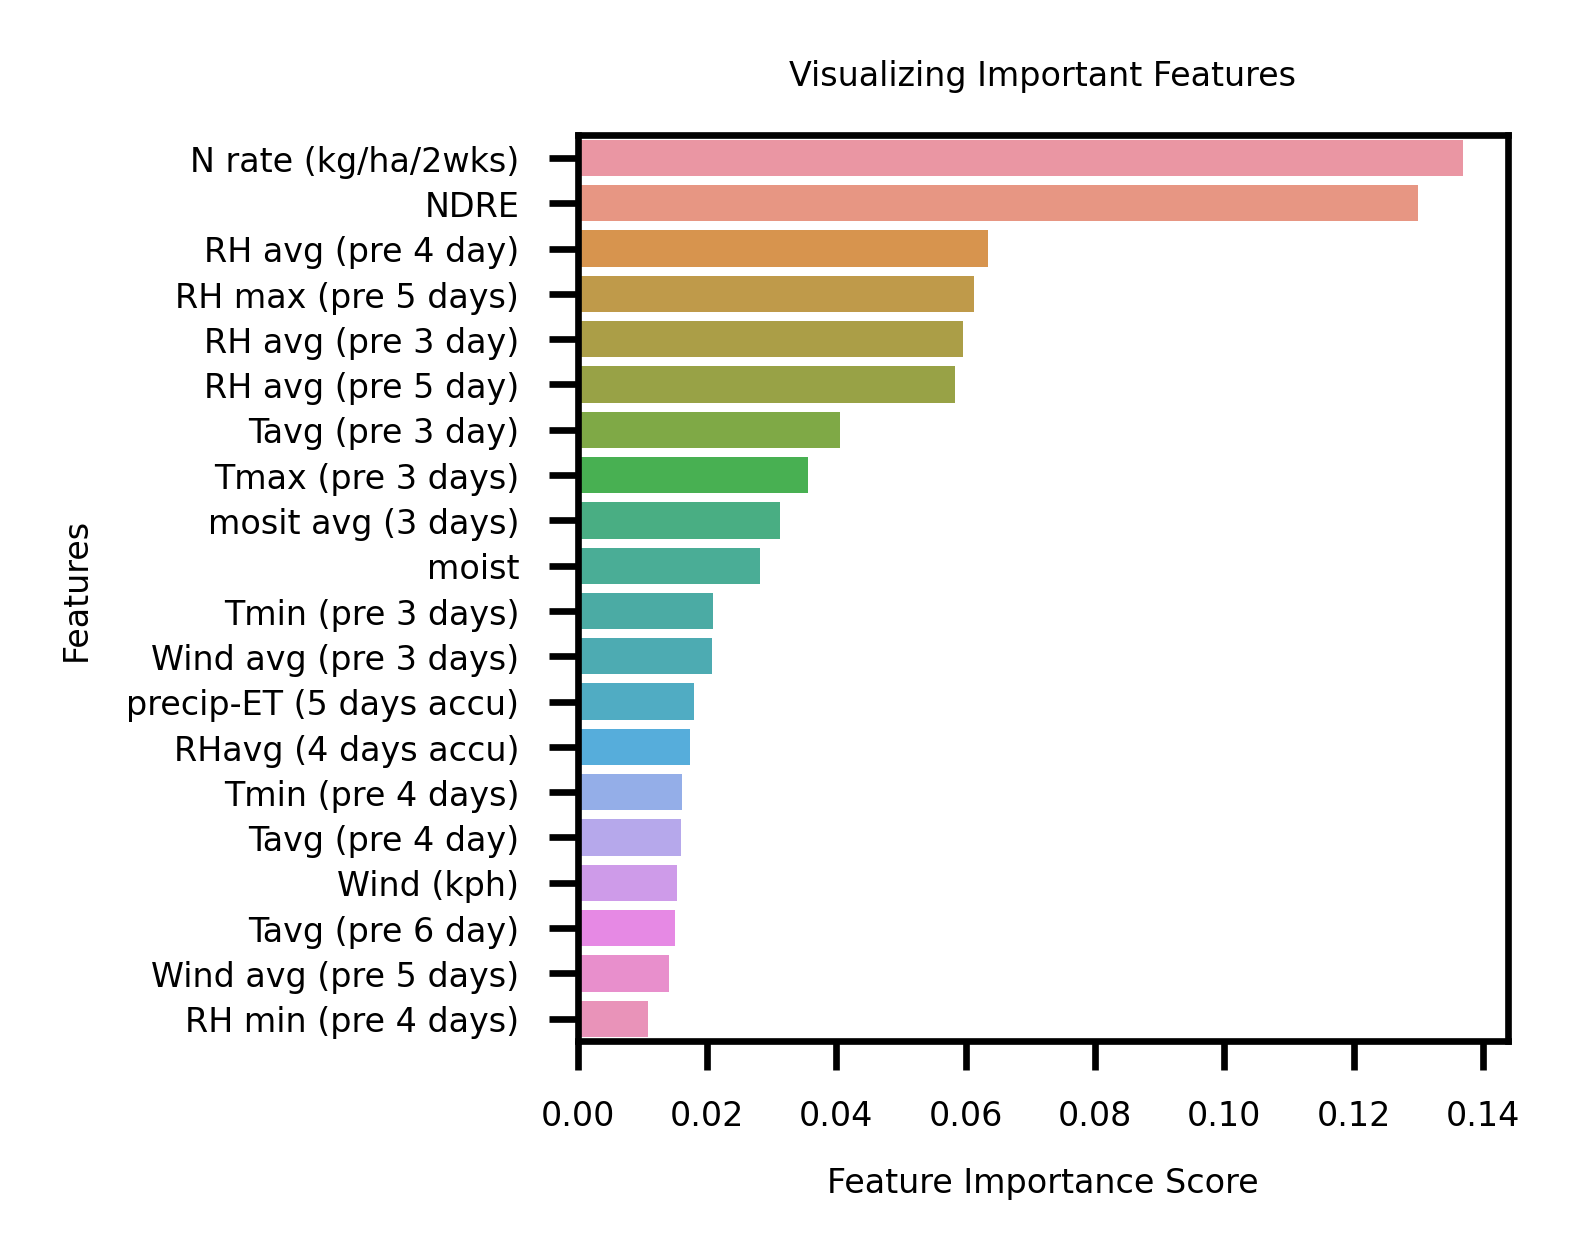

['Model 2019-2020.joblib']

In [68]:
figure(figsize=(2,2), dpi=600)

feature_imp = pd.Series(model.feature_importances_,index=feature_names).sort_values(ascending=False)
feature_imp
sns.barplot(x=feature_imp[:20], y=feature_imp.index[:20])# change the number in the braket [:20] to display the x number of factors

ax = plt.gca()
ax.set_xlabel('Feature Importance Score', fontsize=4)
ax.set_ylabel('Features', fontsize=4)
ax.set_title("Visualizing Important Features", fontsize=4)
ax.tick_params(axis='both', labelsize=4)

plt.savefig('Features importance.png')
plt.show()

dump(model,'Model 2019-2020.joblib')

**The Following parameters&figures are showing the how good the model is

In [69]:
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))

RMSE 0.20960472030171717


In [70]:
print("R squred:", metrics.r2_score(y_test1, y_pred1))

R squred: 0.8488733999669874


## Plot figure show how well random forest model work by compared with ground truth

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


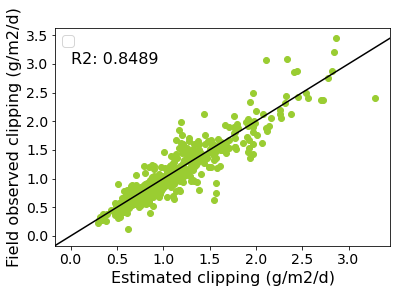

In [71]:
y_pred1 = model.predict(x_test1)
plt.scatter(y_pred1, y_test1, color = 'yellowgreen')
plt.savefig('Model_train_scatterplot.png', dpi=1200)
plt.xlabel('Estimated clipping (g/m2/d)', fontsize=16)
plt.ylabel('Field observed clipping (g/m2/d)', fontsize=16)
plt.axline([0, 0], [1, 1], color='black')
plt.annotate('R2: ' + str(round(metrics.r2_score(y_test1, y_pred1),4)), (0, 3), fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.show()

# Random Forest Model Evaluation
After the model was built, evaluate the model accuracy on a different set of data. In this case, the data was also collected in 2019 and 2020, but from different dates. So I have actually data from these data. The purpose of this section is to validation whether the model actually work, whether has bias.

In [72]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import utils
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from joblib import dump, load
from pandas import DataFrame
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [73]:
trained_model = load('Model 2019-2020.joblib')

In [74]:
cwd = os.getcwd()
file_path = os.path.join(cwd, 'Data', 'Noer clipping 2019-20_test.xlsx')
data_model_built = pd.read_excel(file_path)

#data_eval = pd.read_excel("C:\\Users\\qzhou9\\Growth model - clippings\\Data\\Noer clipping 2019-20_test.xlsx")

In [75]:
x2=data_eval[['mosit avg (3 days)','Rootzone','N rate (kg/ha/2wks)','Days grow','moist',
        'NDRE','Traffic (rounds/week)','Tmax (°C)','Tmax (pre 1 day)',
        'Tmax (pre 2 days)', 'Tmax (pre 3 days)', 'Tmax (pre 4 days)',
        'Tmax (pre 5 days)', 'Tmax (pre 6 days)','Tmin (°C)','Tmin (pre 1 day)',
        'Tmin (pre 2 days)', 'Tmin (pre 3 days)', 'Tmin (pre 4 days)',
        'Tmin (pre 5 days)', 'Tmin (pre 6 days)','Tavg (°C)','Tavg (pre 1 day)',
        'Tavg (pre 2 day)', 'Tavg (pre 3 day)', 'Tavg (pre 4 day)', 'Tavg (pre 5 day)',
        'Tavg (pre 6 day)', 'Tavg (2 days accu)','Tavg (3 days accu)', 'Tavg (4 days accu)',
        'Tavg (5 days accu)','Tavg (6 days accu)','Tavg (7 days accu)','Precip/day (cm)',
        'precip (2 days accu)','precip (3 days accu)', 'precip (4 days accu)','precip (5 days accu)',
        'precip (6 days accu)', 'precip (7 days accu)','ET (cm)','ET (2 days accu)',
        'ET (3 days accu)', 'ET (4 days accu)', 'ET (5 days accu)',
        'ET (6 days accu)', 'ET (7 days accu)', 'precip-ET','precip-ET(2 days accu)',
        'precip-ET (3 days accu)', 'precip-ET (4 days accu)', 'precip-ET (5 days accu)',
        'precip-ET (6 days accu)', 'precip-ET (7 days accu)',
        'Wind (kph)','Wind avg (pre 1 day)','Wind avg (pre 2 days)',
        'Wind avg (pre 3 days)', 'Wind avg (pre 4 days)','Wind avg (pre 5 days)','Wind avg (pre 6 days)',
        'RH max','RH max (pre 1 day)','RH max (pre 2 days)', 'RH max (pre 3 days)',
        'RH max (pre 4 days)', 'RH max (pre 5 days)','RH max (pre 6 days)', 'RH min',
        'RH min (pre 1 day)','RH min (pre 2 days)','RH min (pre 3 days)', 'RH min (pre 4 days)',
        'RH min (pre 5 days)', 'RH min (pre 6 days)','RH avg','RH avg (pre 1 day)','RH avg (pre 2 day)',
        'RH avg (pre 3 day)','RH avg (pre 4 day)','RH avg (pre 5 day)','RH avg (pre 6 day)','RHavg (2 days accu)',
        'RHavg (3 days accu)','RHavg (4 days accu)','RHavg (5 days accu)',
        'RHavg (6 days accu)','RHavg (7 days accu)']]

In [76]:
y2=data_eval['Clipping (g/m2/day)']

In [77]:
feature_names_eval = ['mosit avg (3 days)','Rootzone','N rate (kg/ha/2wks)','Days grow','moist',
        'NDRE','Traffic (rounds/week)','Tmax (°C)','Tmax (pre 1 day)',
        'Tmax (pre 2 days)', 'Tmax (pre 3 days)', 'Tmax (pre 4 days)',
        'Tmax (pre 5 days)', 'Tmax (pre 6 days)','Tmin (°C)','Tmin (pre 1 day)',
        'Tmin (pre 2 days)', 'Tmin (pre 3 days)', 'Tmin (pre 4 days)',
        'Tmin (pre 5 days)', 'Tmin (pre 6 days)','Tavg (°C)','Tavg (pre 1 day)',
        'Tavg (pre 2 day)', 'Tavg (pre 3 day)', 'Tavg (pre 4 day)', 'Tavg (pre 5 day)',
        'Tavg (pre 6 day)', 'Tavg (2 days accu)','Tavg (3 days accu)', 'Tavg (4 days accu)',
        'Tavg (5 days accu)','Tavg (6 days accu)','Tavg (7 days accu)','Precip/day (cm)',
        'precip (2 days accu)','precip (3 days accu)', 'precip (4 days accu)','precip (5 days accu)',
        'precip (6 days accu)', 'precip (7 days accu)','ET (cm)','ET (2 days accu)',
        'ET (3 days accu)', 'ET (4 days accu)', 'ET (5 days accu)',
        'ET (6 days accu)', 'ET (7 days accu)', 'precip-ET','precip-ET(2 days accu)',
        'precip-ET (3 days accu)', 'precip-ET (4 days accu)', 'precip-ET (5 days accu)',
        'precip-ET (6 days accu)', 'precip-ET (7 days accu)',
        'Wind (kph)','Wind avg (pre 1 day)','Wind avg (pre 2 days)',
        'Wind avg (pre 3 days)', 'Wind avg (pre 4 days)','Wind avg (pre 5 days)','Wind avg (pre 6 days)',
        'RH max','RH max (pre 1 day)','RH max (pre 2 days)', 'RH max (pre 3 days)',
        'RH max (pre 4 days)', 'RH max (pre 5 days)','RH max (pre 6 days)', 'RH min',
        'RH min (pre 1 day)','RH min (pre 2 days)','RH min (pre 3 days)', 'RH min (pre 4 days)',
        'RH min (pre 5 days)', 'RH min (pre 6 days)','RH avg','RH avg (pre 1 day)','RH avg (pre 2 day)',
        'RH avg (pre 3 day)','RH avg (pre 4 day)','RH avg (pre 5 day)','RH avg (pre 6 day)','RHavg (2 days accu)',
        'RHavg (3 days accu)','RHavg (4 days accu)','RHavg (5 days accu)',
        'RHavg (6 days accu)','RHavg (7 days accu)']

In [78]:
y_pred2 = trained_model.predict(x2)
narr=np.array(y_pred2)
df = DataFrame({'Clipping_pred (g/m2/day)':narr})
df
df.to_excel('Model 2019-2020_Evaluation.xlsx', sheet_name='sheet1', index=False)

In [81]:
# Combine the clipping and clipping_pred into a new dataframe
df1 = pd.read_excel('Model 2019-2020_Evaluation.xlsx')
col1 = df1['Clipping_pred (g/m2/day)']

df2 = pd.read_excel('.\\Data\\Noer clipping 2019-20_test.xlsx')
#df2 = pd.read_excel('C:\\Users\\qzhou9\\Growth model - clippings\\Data\\Noer clipping 2019-20_test.xlsx')
col2 = df2['Clipping (g/m2/day)']

df3 = pd.DataFrame({'Clipping (g/m2/day)': col2, 'Clipping_pred (g/m2/day)': col1})
df3.to_excel('Training_testing_evaluation.xlsx', index=False)

## Plot figure show how well random forest model work on your site's clipping

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


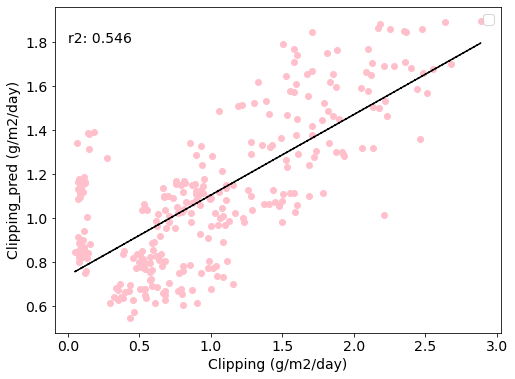

In [82]:
# plot the relationship figure between clipping and clipping_pred

df_comparison = pd.read_excel('Training_testing_evaluation.xlsx')

fig, ax = plt.subplots(figsize=(8,6))

x_comp = df_comparison['Clipping (g/m2/day)'].values.reshape(-1, 1)
y_comp = df_comparison['Clipping_pred (g/m2/day)'].values.reshape(-1, 1)
model_comp = LinearRegression().fit(x_comp, y_comp)
y_comp_pred = model_comp.predict(x_comp)
plt.scatter(df_comparison['Clipping (g/m2/day)'], df_comparison['Clipping_pred (g/m2/day)'], color = 'pink')
plt.plot(x_comp, y_comp_pred, color='black', linestyle='--')
r2 = model_comp.score(x_comp, y_comp)
plt.annotate('r2: ' + str(round(metrics.r2_score(y_comp, y_comp_pred),4)), (0, 1.8), fontsize=14)
#plt.text(df_comparison['Clipping (g/m2/day)'].max(), df_comparison['Clipping_pred (g/m2/day)'].min(), f"r2 = {r2:.2f}", fontsize=14)


plt.xlabel('Clipping (g/m2/day)', fontsize=14)
plt.ylabel('Clipping_pred (g/m2/day)', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

# Set the title
#ax.set_title('Scatter Plot of Clipping_pred vs Clipping')
plt.savefig('Model_evaluation_scatterplot.png', dpi=1200)
plt.show()

In [83]:
print("RMSE", np.sqrt(metrics.mean_squared_error(y2, y_pred2)))

RMSE 0.4941884753599844


In [84]:
#print("R squred:", metrics.r2_score(y, y_pred))

# Make Growth Rate Prediction on Future Clippings
Once I am sure the model works fine and I am satified with the model I just trained, I will  I will save the ".joblib" file I just saved and use it for predicting future data

In [85]:
import numpy as np
import pandas as pd
from sklearn import metrics
from joblib import dump, load
from pandas import DataFrame

In [86]:
trained_model = load('Model 2019-2020.joblib')

In [87]:
cwd = os.getcwd()
file_path = os.path.join(cwd, 'Data', 'Noer clipping 2021.xlsx')
data_model_built = pd.read_excel(file_path)

#data_pred = pd.read_excel("C:\\Users\\qzhou9\\Growth model - clippings\\Data\\Noer clipping 2021.xlsx")

In [88]:
x_mpred=data_pred[['mosit avg (3 days)','Rootzone','N rate (kg/ha/2wks)','Days grow','moist',
        'NDRE','Traffic (rounds/week)','Tmax (°C)','Tmax (pre 1 day)',
        'Tmax (pre 2 days)', 'Tmax (pre 3 days)', 'Tmax (pre 4 days)',
        'Tmax (pre 5 days)', 'Tmax (pre 6 days)','Tmin (°C)','Tmin (pre 1 day)',
        'Tmin (pre 2 days)', 'Tmin (pre 3 days)', 'Tmin (pre 4 days)',
        'Tmin (pre 5 days)', 'Tmin (pre 6 days)','Tavg (°C)','Tavg (pre 1 day)',
        'Tavg (pre 2 day)', 'Tavg (pre 3 day)', 'Tavg (pre 4 day)', 'Tavg (pre 5 day)',
        'Tavg (pre 6 day)', 'Tavg (2 days accu)','Tavg (3 days accu)', 'Tavg (4 days accu)',
        'Tavg (5 days accu)','Tavg (6 days accu)','Tavg (7 days accu)','Precip/day (cm)',
        'precip (2 days accu)','precip (3 days accu)', 'precip (4 days accu)','precip (5 days accu)',
        'precip (6 days accu)', 'precip (7 days accu)','ET (cm)','ET (2 days accu)',
        'ET (3 days accu)', 'ET (4 days accu)', 'ET (5 days accu)',
        'ET (6 days accu)', 'ET (7 days accu)', 'precip-ET','precip-ET(2 days accu)',
        'precip-ET (3 days accu)', 'precip-ET (4 days accu)', 'precip-ET (5 days accu)',
        'precip-ET (6 days accu)', 'precip-ET (7 days accu)',
        'Wind (kph)','Wind avg (pre 1 day)','Wind avg (pre 2 days)',
        'Wind avg (pre 3 days)', 'Wind avg (pre 4 days)','Wind avg (pre 5 days)','Wind avg (pre 6 days)',
        'RH max','RH max (pre 1 day)','RH max (pre 2 days)', 'RH max (pre 3 days)',
        'RH max (pre 4 days)', 'RH max (pre 5 days)','RH max (pre 6 days)', 'RH min',
        'RH min (pre 1 day)','RH min (pre 2 days)','RH min (pre 3 days)', 'RH min (pre 4 days)',
        'RH min (pre 5 days)', 'RH min (pre 6 days)','RH avg','RH avg (pre 1 day)','RH avg (pre 2 day)',
        'RH avg (pre 3 day)','RH avg (pre 4 day)','RH avg (pre 5 day)','RH avg (pre 6 day)','RHavg (2 days accu)',
        'RHavg (3 days accu)','RHavg (4 days accu)','RHavg (5 days accu)',
        'RHavg (6 days accu)','RHavg (7 days accu)']]

In [89]:
#predicted clipping yield will be save as excel file
y_pred3 = trained_model.predict(x_mpred)
narr=np.array(y_pred3)
df_pred = DataFrame({'clipping_pred':narr})
df_pred
df.to_excel('Predicted clipping.xlsx', sheet_name='sheet1', index=False)
predicted_clipping_data = pd.read_excel("Predicted clipping.xlsx")

actual_data = pd.read_excel("C:\\Users\\qzhou9\\Growth model - clippings\\Data\\Noer clipping 2021.xlsx")
actual_data = actual_data[['date', 'Plot']]

merged_df = predicted_clipping_data.merge(actual_data, left_index=True, right_index=True)
merged_df.to_excel("Predicted clipping.xlsx", index=False)


pd.set_option('display.max_rows', None)
print(merged_df)

     Clipping_pred (g/m2/day)       date  Plot
0                    0.835020 2021-05-10     1
1                    0.848964 2021-05-10     6
2                    1.157470 2021-05-10    11
3                    1.137407 2021-05-10    13
4                    1.154944 2021-05-10     1
5                    1.178738 2021-05-10     7
6                    0.954907 2021-05-10    10
7                    0.885445 2021-05-10    14
8                    1.123263 2021-05-17     1
9                    0.808467 2021-05-17     6
10                   1.147613 2021-05-17    11
11                   0.916511 2021-05-17    13
12                   0.855282 2021-05-17     1
13                   0.892145 2021-05-17     7
14                   1.149988 2021-05-17    10
15                   1.154291 2021-05-17    14
16                   0.909689 2021-05-20     1
17                   0.718601 2021-05-20     6
18                   0.612764 2021-05-20    11
19                   0.988443 2021-05-20    13
20           

# Nitrogen Fertilizer Recommendation
Once we have daily predicted clipping yield, and if you recommend to fertilize every week, and adding up the weekly clipping yield, Fertilizer recommendation = weekly clipping yield * 0.039, where 0.039 represent the 3.9% leaf nitrogen content in the creeping bentgrass. I just did in the excel file, no code for this. But should be fairly simple to do so, if you need one.